In [233]:
import pandas as pd
import numpy as np
data = pd.read_csv('samsung_train.txt', sep = '\s+', header = None)
data1 = pd.read_csv('samsung_test.txt', sep = '\s+', header = None)
data = pd.concat([data, data1])
data.reset_index(drop=True, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [234]:
labels = pd.read_csv('samsung_train_labels.txt', header = None)
labels1 = pd.read_csv('samsung_test_labels.txt', header = None)
labels = pd.concat([labels, labels1])
labels.reset_index(drop=True, inplace=True)
labels

,0
0,5
1,5
2,5
3,5
4,5
...,...
10294,2
10295,2
10296,2
10297,2


Obróbka danych wejściowych:

Czy potrzeba wszystkich cech?
Czy potrzebna jest jakaś obróbka?
Czy wiemy, jak obrobić?
Czy wiemy, co jaka cecha znaczy?
Czy potrzebujemy aż dwóch plików?
Pamiętajmy, że mamy do czynienia z Unsupervised Learning. Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?

Zdecydowanie nie są potrzebne wszystkie cechy, konieczna jest redukcja wymiarowości, na potrzeby zadania (łatwej wizualizacji) wybiorę dwie losowe cechy. Jako obróbkę zastosuję standardowe skalowanie danych. Nie mamy infomacji o tym, co oznaczają dane cechy, mozna je odnaleźć w dokumentacji zbioru. Nie potrzebujemy dwóch plików, możemy scalić dane w jeden plik a następnie, w razie potrzeby, dokonać podziału za pomocą tran_test_split() lub kroswalidacji. Podział na dane testowe i treningowe nie jest konieczny przy unsupervised learning, gdy nie znamy klas modelu i nie mozemy porównać wyników z wartościami rzeczywistymi. 

Na potrzeby zadania przeanalizuję kolumnę 22 - tBodyAcc-entropy()-X oraz 23 - tBodyAcc-entropy()-Y

Użyj poznanych metod klasteringu, aby podzielić dany zbiór (pamiętaj o skalowaniu itp.).
Zwizualizuj podział przez każdy algorytm (możesz użyć metod z notatników).

In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


features = [22, 23]
X = data[features]
y = labels[0]
scaler = StandardScaler()
X = scaler.fit_transform(X)
clf = KMeans(n_clusters=6)
clf.fit(X)
y_pred = clf.predict(X)

E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [243]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

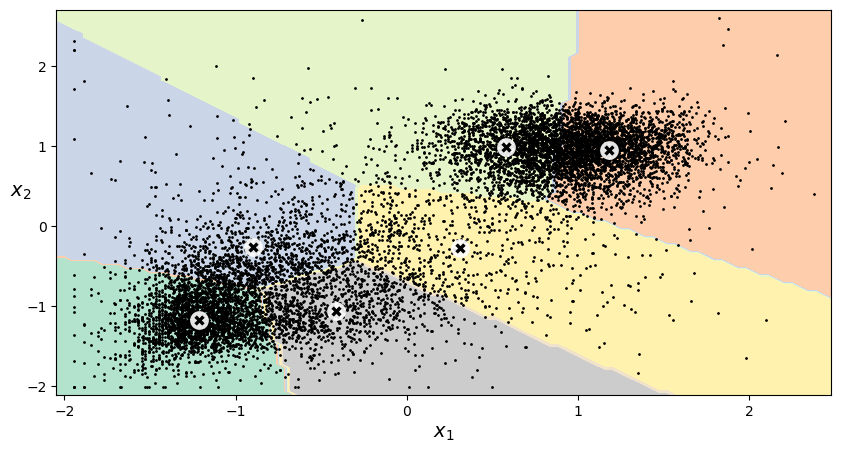

In [244]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

In [248]:
#DBSCAN

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan_2 = DBSCAN(eps=0.1, min_samples=5)
dbscan_2.fit(X)

DBSCAN(eps=0.1)

In [246]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

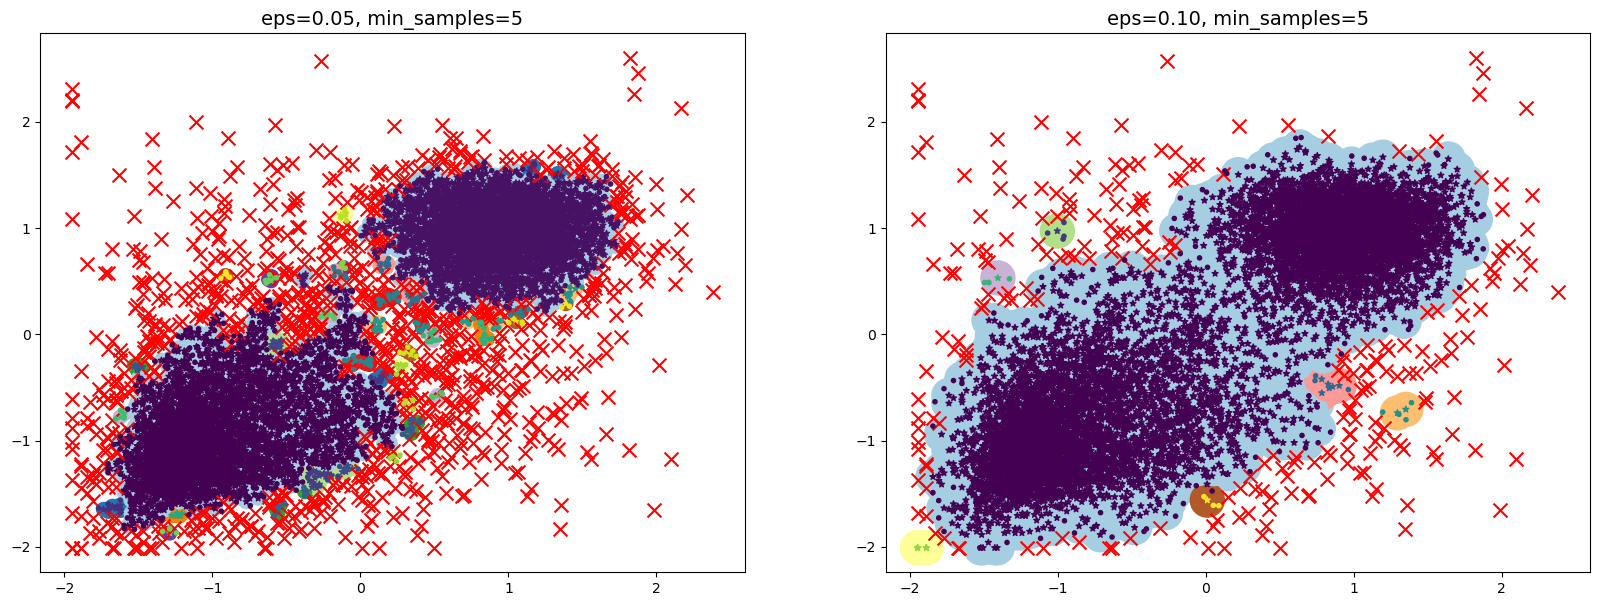

In [249]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan_2, X, size=600)

plt.show()

In [250]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [251]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana zmodyfikowana 
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

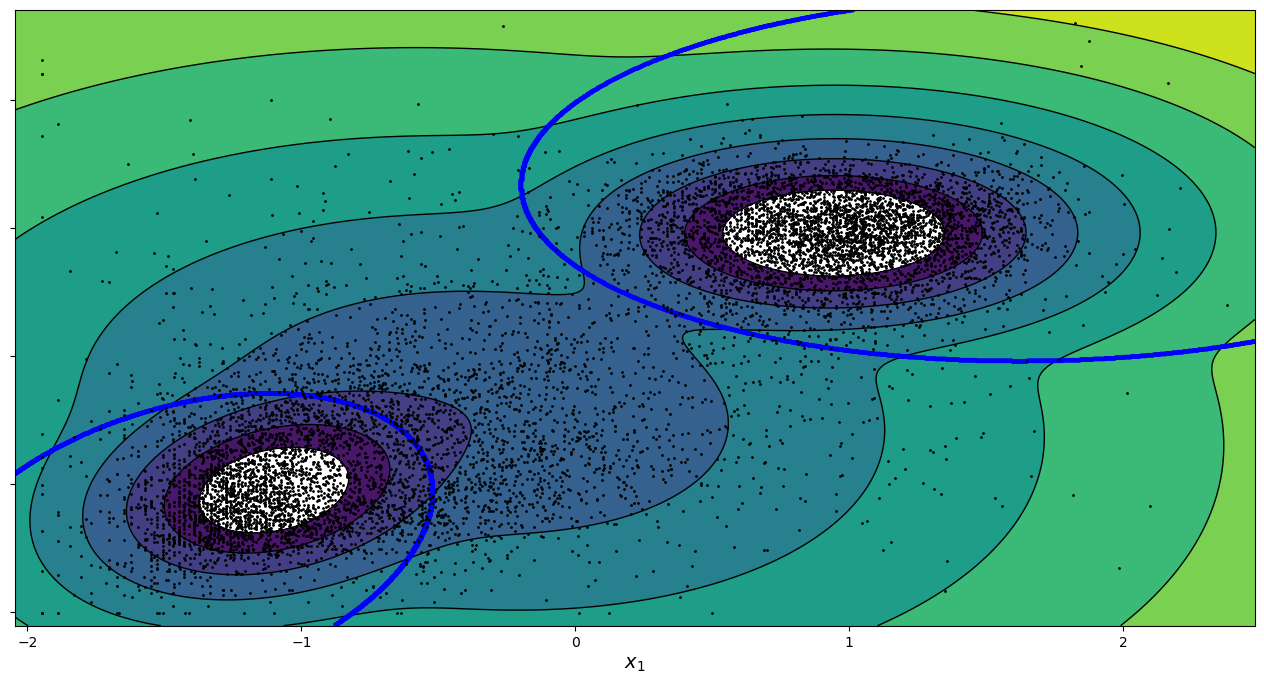

In [252]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=2)

log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)

print("Bez KMeans :", log_reg.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(
        n_clusters=40,
        random_state=2
    )),
    ("log_reg", LogisticRegression(
        multi_class="ovr",
        max_iter=5000,
        random_state=2
    )),
])
a = pipeline.fit(X_train, y_train)
a
print("Z KMeans :", pipeline.score(X_test, y_test))

Bez KMeans : 0.49281553398058253


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Z KMeans : 0.5033009708737864


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


              precision    recall  f1-score   support

           1       0.50      0.66      0.57       453
           2       0.50      0.32      0.39       402
           3       0.51      0.57      0.54       334
           4       0.42      0.24      0.30       439
           5       0.47      0.59      0.52       481
           6       0.59      0.62      0.60       466

    accuracy                           0.50      2575
   macro avg       0.50      0.50      0.49      2575
weighted avg       0.50      0.50      0.49      2575



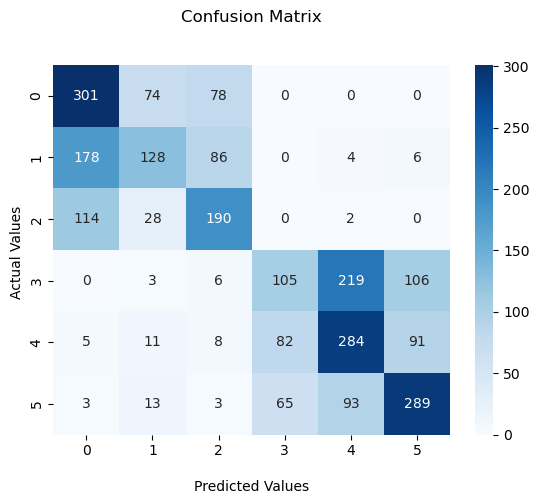

In [261]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model_lr = pipeline.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [263]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= int(X_train.shape[0]*0.001))
model_knn.fit(X_train, y_train)

print("Bez KMeans :", model_knn.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(
        n_clusters=40,
        random_state=2
    )),
    ("knn", KNeighborsClassifier(
        n_neighbors= int(X_train.shape[0]*0.001)
    )),
])
pipeline.fit(X_train, y_train)

print("Z KMeans :", pipeline.score(X_test, y_test))

Bez KMeans : 0.4722330097087379


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Z KMeans : 0.4733980582524272


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


              precision    recall  f1-score   support

           1       0.48      0.60      0.53       453
           2       0.38      0.33      0.35       402
           3       0.51      0.49      0.50       334
           4       0.40      0.41      0.41       439
           5       0.46      0.46      0.46       481
           6       0.61      0.54      0.57       466

    accuracy                           0.47      2575
   macro avg       0.47      0.47      0.47      2575
weighted avg       0.47      0.47      0.47      2575



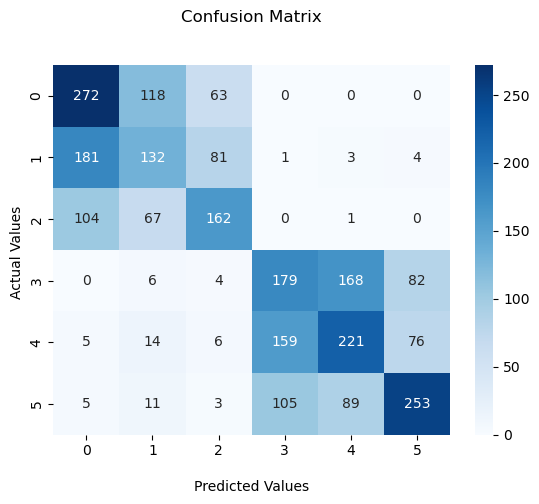

In [264]:
model_knn = pipeline.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)
print(classification_report(y_test, predictions_knn))
cm = confusion_matrix(y_test, predictions_knn)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

Czym różni się KMeans, K-fold i K Nearest Neighbors

KMeans - algorytm unsupervised learning służący do poszukiwania klastrów wśród danych, zasada działania polega na dobieraniu centroid i pomiaru ich odległośći od puntków, a następnie odpowiednim przesuwaniu centroidy, w celu minimalizacji tych odległości.
K-fold - algorytm slużący do kroswalidacji danych. Tworzy kilka różnych zbiorów danych, za każdym razem traktując inną "porcję" danych jako zbiór testowy. Na każdym takim zbiorze wylicza metryki dla testowanego modelu.
K Nearest Neighbors - algorytm wykorzystywany zarówno w supervised jak i unsupervised learningu, polega na przypisywaniu klasy punktowi na podstawie klas jego najblizszych sąsiadów. Liczba najbliższych punktów branych pod uwagę jest określana przez użytkownika lub okreslana na podstawie gęstości pobliskich danych. 